<a href="https://colab.research.google.com/github/Exvolution/Project/blob/main/EmergencyServicesAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# We can add whatever mainline libraries and models we want to use and add it into the function
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, GRU #RNN class not included since the intention is sufficiently long memory to run predictions 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
def randomforest(adddatamain_df, outcome, weights, trees, shuffle, durability, encoding): 
  # Summary description and some analytical data obtained from the dataframe
  adddatamain_df.describe() 
  # Mapping required since model can only understand numerical representation given current standards
  # Conversion to numerical representation for anything that is not in numerics
  adddatamain_df = pd.get_dummies(data = adddatamain_df,columns = encoding) 
  # Check that it worked
  print(adddatamain_df.iloc[:,5:].head(5)) 
  # What we want predicted: labels = np.array(adddatamain_df[outcome]) 
  
  labels = np.array(adddatamain_df[outcome])
  print(labels)
  adddatamain_dfweights = adddatamain_df[weights].copy()
  print(adddatamain_dfweights)
  adddatamain_dfheaders_list = list(adddatamain_dfweights.columns)
  adddatamain_dfweights = np.array(adddatamain_dfweights)
  trainY2, testY2, trainX2, testX2 = train_test_split(adddatamain_dfweights, labels, test_size = durability, random_state = shuffle)
  
  # Normally a baseline to determine success or failure of a model would be established here, but given the context of our use case this is generally arbitrary since any problem could have any tolerance associated with it
  # Moving onto actual data model to be used, 
  rf = RandomForestRegressor(n_estimators = trees, random_state = shuffle)
  # Actual training
  rf.fit(trainX2, trainY2)
  # Followed by prediction 
  # Use the forest's predict method on the test data
  predictions = rf.predict(testX2)
  # Calculate the absolute errors
  errors = abs(predictions - testY2)
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / testY2)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

In [7]:
import urllib
from urllib.request import Request, urlopen, URLError
import requests
#response = urlopen(req) requests.get(req)
url = input('enter database URL without scheme (http or https):')
if url == "NIL":
  adddata2_df = NIL
  print(NIL)
else:
  req = urllib.parse.quote(url)
  reqfull = urllib.parse.urljoin("https:",req)
  print(reqfull)
  try:
    response = requests.get(reqfull)
  except URLError as e:
      if hasattr(e, 'reason'):
        print('We failed to reach a server.')
        print('Reason: ', e.reason)
      elif hasattr(e, 'code'):
        print('The server couldn\'t fulfill the request.')
        print('Error code: ', e.code)
  else:
    adddata2 = response.json()
    print(adddata2)
    adddata2_df=pd.DataFrame(adddata2) 
# https://raw.githubusercontent.com/ysjprojects/DLW-Dataset/main/vitals_readings.json [provided dataset]

enter database URL without scheme (http or https)://raw.githubusercontent.com/ysjprojects/DLW-Dataset/main/vitals_readings.json
https://raw.githubusercontent.com/ysjprojects/DLW-Dataset/main/vitals_readings.json
[{'Age': 43, 'Sex': 1, 'Resting Blood Pressure': 120, 'Maximum Heart Rate': 120, 'Resting ECG': 0, 'Is Emergency': False}, {'Age': 57, 'Sex': 1, 'Resting Blood Pressure': 130, 'Maximum Heart Rate': 115, 'Resting ECG': 1, 'Is Emergency': False}, {'Age': 60, 'Sex': 1, 'Resting Blood Pressure': 140, 'Maximum Heart Rate': 170, 'Resting ECG': 0, 'Is Emergency': False}, {'Age': 56, 'Sex': 1, 'Resting Blood Pressure': 130, 'Maximum Heart Rate': 163, 'Resting ECG': 0, 'Is Emergency': True}, {'Age': 43, 'Sex': 1, 'Resting Blood Pressure': 110, 'Maximum Heart Rate': 161, 'Resting ECG': 1, 'Is Emergency': True}, {'Age': 51, 'Sex': 0, 'Resting Blood Pressure': 130, 'Maximum Heart Rate': 142, 'Resting ECG': 1, 'Is Emergency': False}, {'Age': 42, 'Sex': 1, 'Resting Blood Pressure': 120, 'Max

In [ ]:
#In this case for image collection, though usually there would be an input: a smack of the machine, followed by another to take from a \
# dedicated database
!pip install kaggle
import json
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"tristantankyewei","key":"4faf70705bef7e2ec798591076ee2c3a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d gti-upm/leapgestrecog
!unzip leapgestrecog.zip


Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
# Organised as such since normally it will be arranged in a properly tensorflow friendly manner
import glob 
import shutil
import os 
 
os.mkdir('/content/hand_gesture_photos_organised') 
os.mkdir('/content/hand_gesture_photos_organised/palm') 
os.mkdir('/content/hand_gesture_photos_organised/l/') 
os.mkdir('/content/hand_gesture_photos_organised/fist/') 
os.mkdir('/content/hand_gesture_photos_organised/thumb/') 
os.mkdir('/content/hand_gesture_photos_organised/index/')

    
destination_dir = "/content/hand_gesture_photos_organised/palm/"
pattern = "/content/leapGestRecog/*/01_palm/*.png"  
for img in glob.glob(pattern):
    destination_path = destination_dir + img.split('/')[-1]
    shutil.copy2(img, destination_path)

destination_dir = "/content/hand_gesture_photos_organised/l/"
pattern = "/content/leapGestRecog/*/02_l/*.png"  
for img in glob.glob(pattern):
    destination_path = destination_dir + img.split('/')[-1]
    shutil.copy2(img, destination_path)

destination_dir = "/content/hand_gesture_photos_organised/fist/"
pattern = "/content/leapGestRecog/*/03_fist/*.png"  
for img in glob.glob(pattern):
    destination_path = destination_dir + img.split('/')[-1]
    shutil.copy2(img, destination_path)

destination_dir = "/content/hand_gesture_photos_organised/thumb/"
pattern = "/content/leapGestRecog/*/05_thumb/*.png"  
for img in glob.glob(pattern):
    destination_path = destination_dir + img.split('/')[-1]
    shutil.copy2(img, destination_path)

destination_dir = "/content/hand_gesture_photos_organised/index/"
pattern = "/content/leapGestRecog/*/06_index/*.png"  
for img in glob.glob(pattern):
    destination_path = destination_dir + img.split('/')[-1]
    shutil.copy2(img, destination_path)

In [ ]:
data_dir = pathlib.Path("/content/hand_gesture_photos_organised/")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

10000


In [21]:
batch_size = 32
img_height = 180
img_width = 180


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 5 classes.
Using 8000 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['fist', 'index', 'l', 'palm', 'thumb']


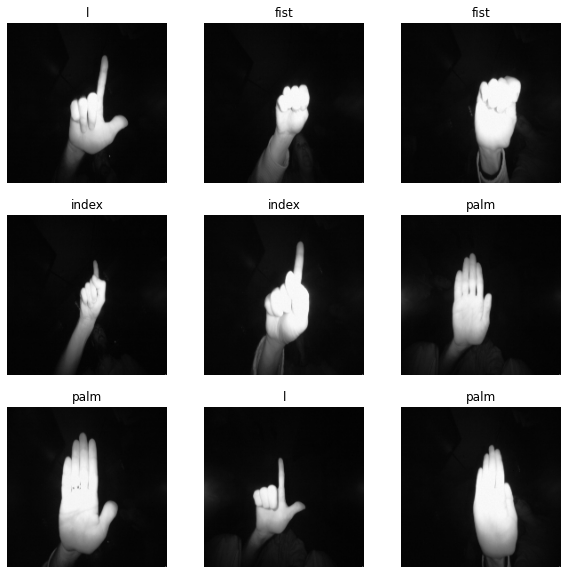

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

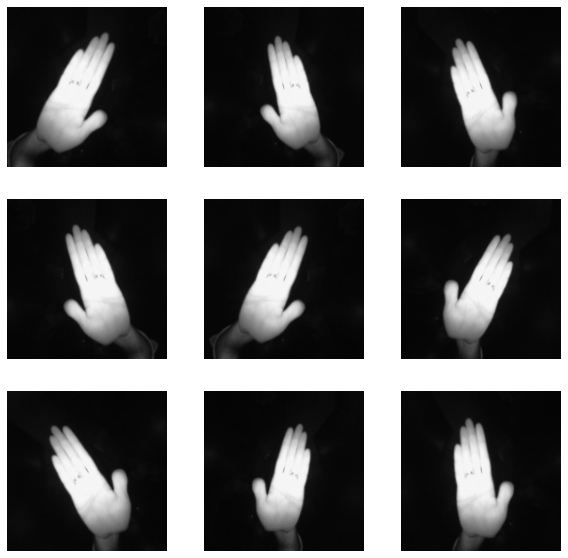

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax", name="outputs")
])

Model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax", name="outputs")
])

mOdel = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax", name="outputs")
])

In [ ]:
model.compile(optimizer='adam', # easy to use and for computation but not as reliable as others
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
Model.compile(optimizer='nadam', # supposedly an upgrade over adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
mOdel.compile(optimizer='adadelta', # extremely reliable, but computationally expensive
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
mOdel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

250/250 [==============================] - 210s 837ms/step - loss: 0.1035 - accuracy: 0.9682 - val_loss: 0.0188 - val_accuracy: 0.9935


160/250 [==================>...........] - ETA: 1:17 - loss: 0.7648 - accuracy: 0.7121

KeyboardInterrupt: ignored

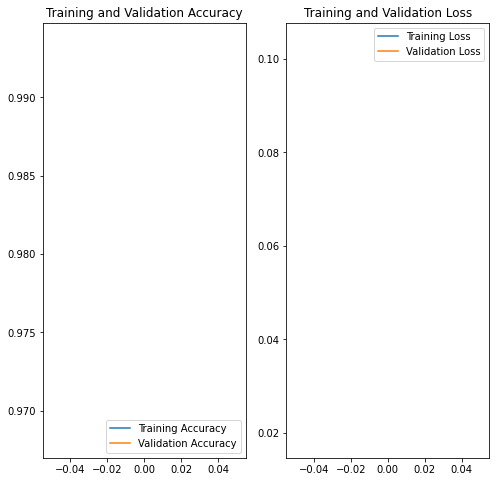

In [ ]:
#To observe how training went
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
# Predictions 
# select a random image from the internet
hand_url = "https://i.imgur.com/ESH1NHw.jpg"
hand_path = tf.keras.utils.get_file('hand', origin=hand_url)

img = tf.keras.utils.load_img(
    hand_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

score = model.predict(img_array)[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: ignored

In [ ]:
epochs1=20
history = Model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs1
)

In [23]:
#To observe how training went
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: ignored

In [24]:
# Predictions 
hand_url = "https://i.imgur.com/ESH1NHw.jpg"
hand_path = tf.keras.utils.get_file('hand', origin=hand_url)

img1 = tf.keras.utils.load_img(
    hand_path, target_size=(img_height, img_width)
)
img_array1 = tf.keras.utils.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0) # Create a batch

score1 = Model.predict(img_array1)[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score1)], 100 * np.max(score1))
)

NameError: ignored

In [ ]:
epochs2=20
history = mOdel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs2
)

In [ ]:
#To observe how training went
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
# Predictions 
hand_url = "https://i.imgur.com/ESH1NHw.jpg"
hand_path = tf.keras.utils.get_file('hand', origin=hand_url)


img2 = tf.keras.utils.load_img(
    hand_path, target_size=(img_height, img_width)
)
img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0) # Create a batch

score2 = mOdel.predict(img_array2)[0]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score2)], 100 * np.max(score2))
)    

NameError: ignored

In [36]:
def find_max(list):
    max = list[0]
    for a in list:
        if a > max:
            max = a
    return max

In [35]:
#Final comparison between the 3

adam = model.predict(img_array)[0]
nadam = Model.predict(img_array1)[0]
adadelta = mOdel.predict(img_array2)[0]

scorelist = [adam, nadam, adadelta]
namelist = ["adam","nadam", "adelta"]

Largestval = find_max(scorelist)


for a in range(len(scorelist)):
  if scorelist[a] == find_max(scorelist):
  print(namelist[a])

print(
    "The strongest model is:", namelist[a]
)
print(
    "With a prediction of {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Largestval)], 100 * np.max(Largestval))
)

NameError: ignored

In [ ]:
adddata2_df.head()

In [ ]:
randomforest(adddata2_df, ["Is Emergency"], ['Resting Blood Pressure','Maximum Heart Rate'], 10000, False, 0.2, ["Is Emergency"]) 
# Run twice to determine what the Truth Table names itself into, while a feedback loop for specified answer is doable, keeping the code generally applicable makes it more functional if something else needs to be predicted such as age

In [ ]:
randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate'], 10000, False, 0.2, ["Is Emergency"]) # Pick True because that is more fucntional given use case 

A very decent accuracy on predicting if it is an emergency or not

In [ ]:
randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate','Age'], 10000, False, 0.2, ["Is Emergency"])

Slight decrease in accuracy observed when including age

In [ ]:
randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate'], 100000, False, 0.2, ["Is Emergency"])
randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate','Age'], 10000, False, 0.2, ["Is Emergency"])

In [38]:
def randomforestit(adddatamain_df, outcome, weights, trees, shuffle, durability, encoding): #removed and altered additional print() and comments for iterability
  adddatamain_df.describe() 
  adddatamain_df = pd.get_dummies(data = adddatamain_df,columns = encoding) 
  adddatamain_df.iloc[:,5:].head(5) 
  
  labels = np.array(adddatamain_df[outcome])
  adddatamain_dfweights = adddatamain_df[weights].copy()
  adddatamain_dfheaders_list = list(adddatamain_dfweights.columns)
  adddatamain_dfweights = np.array(adddatamain_dfweights)
  trainY2, testY2, trainX2, testX2 = train_test_split(adddatamain_dfweights, labels, test_size = durability, random_state = shuffle)
  

  rf = RandomForestRegressor(n_estimators = trees, random_state = shuffle)
  rf.fit(trainX2, trainY2)
  predictions = rf.predict(testX2)
  errors = abs(predictions - testY2)
  mape = 100 * (errors / testY2)
  accuracy = 100 - np.mean(mape)
  return accuracy

In [40]:
lst1 = []
lst2 = []
lst3 = []
for i in range(0,42): # this is normal range for i, but actually running this will take hours, maybe even a day by estimate
   for j in range(1,10):
      lst1.append(randomforestit(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate'], 100000, i, j/10, ["Is Emergency"]))
      lst2.append(randomforestit(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate','Age'], 100000, i, j/10, ["Is Emergency"]))
      lst3.append([i,j])

print("Max 2 elem is:", find_max(lst1))
print("Max 3 elem is:", find_max(lst2))
print(lst3)
print(lst1)

for k in range(len(lst1)):
  if lst1[k] == find_max(lst1):
    print(k)
for l in range(len(lst2)):
  if lst2[l] == find_max(lst2):
    print(l)
print(lst3[k])
print(lst3[l]) #any more complicated and runtime became an issue

Max 2 elem is: 91.117188822277
Max 3 elem is: 89.4606949647176
[[0, 1], [0, 2]]
[91.117188822277, 89.77116374300617]
0
0
[0, 2]
[0, 2]


Therefore we should use the i and j as the values for use case since they maximise the accuracy of the model

In [ ]:
#So now we can use the results of these 2 to anaalyse if someone may have a real emergency

#send as output signal to devices in range as well as medical services

print("model.predict(img)", "Age",	"Sex",	"Resting Blood Pressure",	"Maximum Heart Rate",	"Resting ECG",	"Is Emergency", randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate'], 10000, i, j/10, ["Is Emergency"]),\
      randomforest(adddata2_df, ["Is Emergency_True"], ['Resting Blood Pressure','Maximum Heart Rate','Age'], 10000, i, j/10, ["Is Emergency"]))
# Using the strongest model of the 3 and the maximum i and j values according to the data in this exact format, to allow for medical services to respond if they think they should regardless of what the data says
